# US air force on-time and delayed flights analysis
## by Mahmoud Samneh


<br>

## Introduction

> Through this analysis we will highlight and study the flights movment through each airport from the 2017 till 2020
> we will be exposed to each factor that influnces the flights movment 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading the data

In [2]:
flights  = pd.read_csv('flights_dataset.csv')
flights.drop('Unnamed: 21',axis=1, inplace = True)

In [84]:
#explore the data set visually 
flights.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,1,MQ,Envoy Air,SAV,"Savannah, GA: Savannah/Hilton Head International",65.0,15.0,3.41,0.71,...,0.0,6.56,1.0,1.0,601.0,180.0,29.0,129.0,0.0,263.0
1,2019,1,MQ,Envoy Air,SDF,"Louisville, KY: Louisville Muhammad Ali Intern...",61.0,18.0,2.70,1.01,...,0.0,5.37,1.0,0.0,890.0,180.0,36.0,383.0,0.0,291.0
2,2019,1,MQ,Envoy Air,SGF,"Springfield, MO: Springfield-Branson National",428.0,80.0,13.31,5.18,...,0.0,34.09,15.0,0.0,3954.0,705.0,213.0,982.0,0.0,2054.0
3,2019,1,MQ,Envoy Air,SHV,"Shreveport, LA: Shreveport Regional",174.0,28.0,5.97,1.17,...,0.0,9.72,0.0,0.0,1655.0,360.0,55.0,268.0,0.0,972.0
4,2019,1,MQ,Envoy Air,SJT,"San Angelo, TX: San Angelo Regional/Mathis Field",135.0,23.0,10.78,0.35,...,0.0,5.33,2.0,0.0,835.0,320.0,27.0,192.0,0.0,296.0


In [86]:
#explore the data Statistically

flights.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,74122.000000,74122.000000,73990.000000,73807.00000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000,73990.000000
mean,2018.686031,6.360244,342.747479,57.42435,16.439332,1.941004,18.464351,0.117075,20.320586,8.364414,0.778348,3763.230977,1194.574105,204.405460,911.549939,5.743682,1446.948290
std,1.090397,3.522785,961.795630,162.62003,40.816889,6.272629,62.266710,0.550484,63.142479,56.656045,3.382185,11644.603353,3479.872849,768.351584,3700.888457,35.706715,4613.701311
min,2017.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,43.000000,5.00000,1.740000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,253.000000,79.000000,0.000000,29.000000,0.000000,42.000000
50%,2019.000000,6.000000,91.000000,14.00000,5.000000,0.210000,3.480000,0.000000,4.130000,1.000000,0.000000,858.000000,300.000000,11.000000,129.000000,0.000000,267.000000
75%,2020.000000,9.000000,232.000000,39.00000,13.397500,1.580000,10.460000,0.000000,13.080000,4.000000,1.000000,2492.000000,923.000000,126.000000,425.000000,0.000000,943.000000
max,2021.000000,12.000000,21931.000000,4176.00000,1027.450000,188.680000,1884.420000,26.070000,1443.450000,4951.000000,143.000000,429194.000000,151581.000000,28294.000000,112018.000000,3194.000000,147167.000000


As we can see from the above exploration we will focus on many aspects to analyse the dataset and to extract insights that will help us improve the flight's  movement through this project we will focus on the below study cases. 

<ul>
<li><a href="#Case study 1">Case study 1: what is the portion of canceled and diverted of top ten airports? </a></li>
<li><a href="#Case study 2">Case study 2: Through 2017 till 2020 are delayed flights increase or decrease?</a></li>
<li><a href="#Case study 3">Case study 3: For each airport what is the delaying factor that contributed the most for the flights?</a></li>
<li><a href="#Case study 4">Case study 4: For the airports with the highest value of delayed flights what is the cause that contributed the most ?</a></li>
</ul>


<a id='Case study 1'></a>

### Case study 1: what is the portion of canceled and diverted of top ten airports?

> By answering this question we will demonstrate the percentage of cancelled and diverted flights
>the percentages yields the performance of the airport in general and it shows how each airport stand to each other


In [4]:
#prepare the data to get the portion of canceled and diverted flights 

topten_portions = flights.groupby('airport').sum('arr_flights')

topten_portions['cancelled_diverted_portion'] = (topten_portions['arr_diverted'] + topten_portions['arr_cancelled']) / topten_portions['arr_flights']

topten_portions.sort_values('cancelled_diverted_portion', ascending = False, inplace = True)

In [5]:
#test our code

topten_portions.head()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,cancelled_diverted_portion
airport,,,,,,,,,,,,,,,,,,
MMH,50463,128,1092.0,220.0,90.30,12.24,36.87,0.00,80.60,222.0,9.0,19190.0,9104.0,2076.0,1622.0,0.0,6388.0,0.211538
ART,12113,27,270.0,59.0,22.45,7.50,13.09,0.06,15.90,32.0,9.0,4352.0,1193.0,537.0,713.0,15.0,1894.0,0.151852
SUN,100930,314,5674.0,618.0,233.26,61.71,174.92,1.15,146.98,110.0,580.0,36681.0,13755.0,7135.0,7237.0,20.0,8534.0,0.121607
CDB,18181,69,150.0,62.0,5.30,1.37,25.58,11.03,18.72,5.0,11.0,2209.0,261.0,39.0,664.0,325.0,920.0,0.106667
ASE,98909,313,24165.0,5137.0,1652.12,354.05,1545.33,5.63,1579.87,1304.0,834.0,463791.0,183332.0,61626.0,89246.0,857.0,128730.0,0.088475


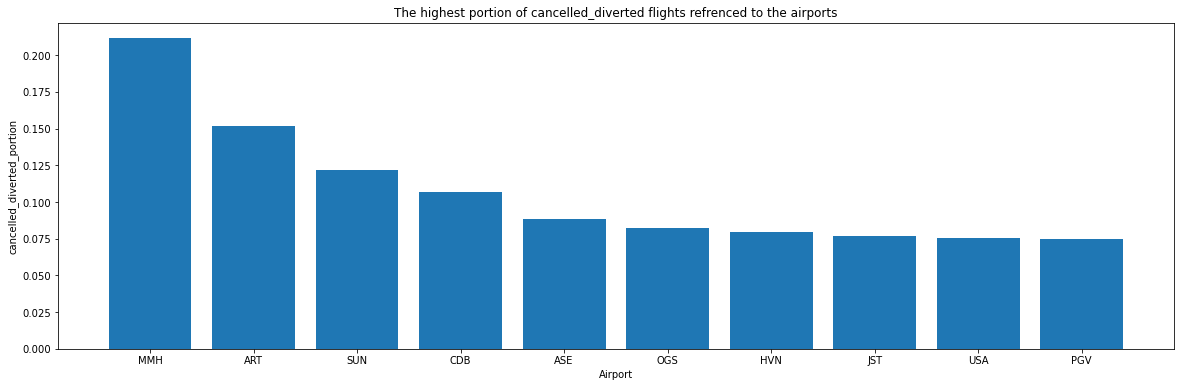

In [7]:
#visualizing for the top ten airports 

x = topten_portions.head(10).reset_index()

plt.figure(figsize=(20, 6))
plt.bar(x['airport'],x['cancelled_diverted_portion']);
plt.xlabel('Airport');
plt.ylabel('cancelled_diverted_portion');
plt.title('The highest portion of cancelled_diverted flights refrenced to the airports');

From  the previous bar chart we found the airports that has the highest not arrival flights which will make the passengers think twice when they see these names once they book there flights , a bad trend for revenue which needs to do gap analysis 

<a id='Case study 2'></a>

### Case study 2: Through 2017 till 2020 are delayed flights increase or decrease?

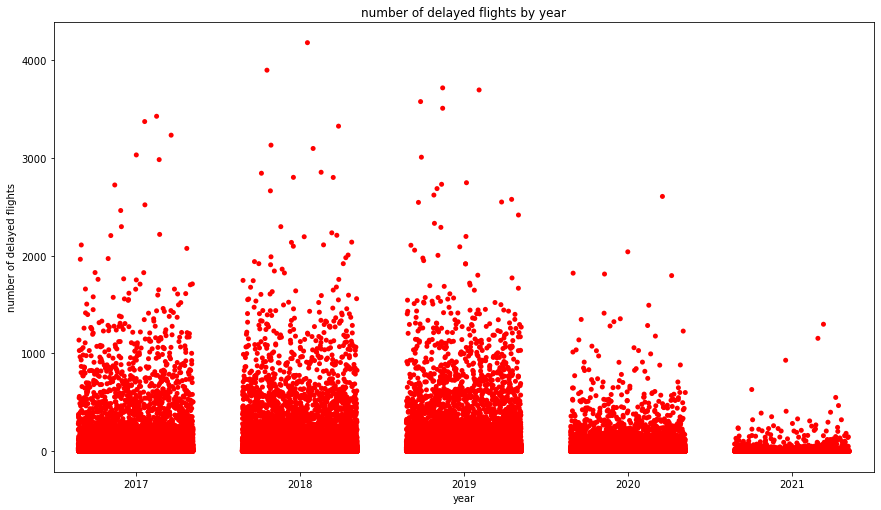

In [49]:
#visualizing the required data between year and arr_del15 coulumn

plt.figure(figsize=[14.7,8.27])
sb.stripplot(data = flights, x = 'year', y='arr_del15', color = 'r',jitter=0.35)
plt.title('number of delayed flights by year')
plt.xlabel('year')
plt.ylabel('number of delayed flights');

As we can see from the scatter chart that number of flights through all the airports is being reduced which is a good indicator

<a id='Case study 3'></a>

### Case study 3: For each airport what is the delaying factor that contributed the most for the flights?

In [36]:
# preparing the data - extracting the required data for each delay factor 

delayed_factor = [{'Total':flights[' carrier_delay'].sum()},{'Total':flights['weather_delay'].sum()},
                  {'Total':flights['nas_delay'].sum()},{'Total':flights['security_delay'].sum()},
                  {'Total':flights['late_aircraft_delay'].sum()}]

delayed_factor = pd.DataFrame(delayed_factor,index =['carrier_delay','weather_delay',
                                                   'nas_delay','security_delay','late_aircraft_delay'],columns =['Total'])
delayed_factor

,Total
carrier_delay,88386538.0
weather_delay,15123960.0
nas_delay,67445580.0
security_delay,424975.0
late_aircraft_delay,107059704.0


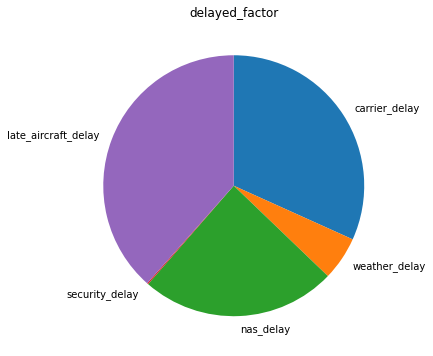

In [93]:
#visualizing the result 

plt.figure(figsize=(20, 6))
plt.pie(delayed_factor['Total'], labels = delayed_factor.index, startangle = 90, counterclock = False,);
plt.title('delayed_factor');

Through this pie chart we found that late_aircraft and carrier are the most affective factors for delaying the flights we need to dig deep to reduce this delay

<a id='Case study 4'></a>

### Case study 4: for the airports with the highest value of delayed flights what is the cause that contributed the most ?


In [100]:
#preparing the data -reassemble the data and put into new data frame for the number of delyaed flights by the reason 

topten_delayed = flights.groupby('airport').sum('arr_flights')
topten_delayed['portion_of_delayed_flights'] = topten_delayed['arr_del15'] / topten_delayed['arr_flights']
top_delayed = topten_delayed.sort_values('portion_of_delayed_flights', ascending = False)
top_delayed.reset_index(inplace = True)
top_delayed = top_delayed.head(10)
top_delayed

,airport,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,portion_of_delayed_flights
0,YNG,2018,1,2.0,2.0,1.39,0.00,0.61,0.00,0.00,0.0,0.0,119.0,97.0,0.0,22.0,0.0,0.0,1.000000
1,UST,10085,30,66.0,29.0,3.76,0.00,8.11,0.00,17.10,0.0,0.0,2933.0,359.0,0.0,824.0,0.0,1750.0,0.439394
2,CDB,18181,69,150.0,62.0,5.30,1.37,25.58,11.03,18.72,5.0,11.0,2209.0,261.0,39.0,664.0,325.0,920.0,0.413333
3,PSE,82748,251,2544.0,778.0,370.89,12.06,107.39,1.61,286.02,109.0,9.0,52178.0,22882.0,853.0,4935.0,68.0,23440.0,0.305818
4,BQN,242184,735,6554.0,1903.0,721.51,38.24,411.59,4.72,726.96,223.0,6.0,122284.0,45381.0,3514.0,19613.0,335.0,53441.0,0.290357
5,PGV,24220,102,976.0,264.0,99.36,19.32,42.30,0.06,102.98,67.0,6.0,19420.0,6163.0,1859.0,1595.0,10.0,9793.0,0.270492
6,EWR,1186935,3700,469682.0,125552.0,18722.96,2729.68,77147.19,97.30,26854.80,15871.0,1650.0,9857298.0,1705121.0,315734.0,5429918.0,5462.0,2401063.0,0.267313
7,OTH,98909,313,1392.0,370.0,94.30,12.71,56.82,0.29,205.83,69.0,33.0,26802.0,8184.0,629.0,2936.0,6.0,15047.0,0.265805
8,FLO,10090,17,170.0,40.0,17.33,0.34,8.04,0.00,14.30,2.0,0.0,2589.0,1025.0,46.0,263.0,0.0,1255.0,0.235294
9,SFO,922460,2902,616865.0,144897.0,26406.37,3692.03,75376.03,161.24,39261.38,14485.0,1576.0,10555195.0,2233528.0,351846.0,4917771.0,10169.0,3041881.0,0.234893


In [101]:
#gathering the required data into one data frame

top = top_delayed[['airport','carrier_ct',' weather_ct','nas_ct','security_ct','late_aircraft_ct']]
top.set_index('airport',inplace = True)
top

,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
airport,,,,,
YNG,1.39,0.00,0.61,0.00,0.00
UST,3.76,0.00,8.11,0.00,17.10
CDB,5.30,1.37,25.58,11.03,18.72
PSE,370.89,12.06,107.39,1.61,286.02
BQN,721.51,38.24,411.59,4.72,726.96
PGV,99.36,19.32,42.30,0.06,102.98
EWR,18722.96,2729.68,77147.19,97.30,26854.80
OTH,94.30,12.71,56.82,0.29,205.83
FLO,17.33,0.34,8.04,0.00,14.30


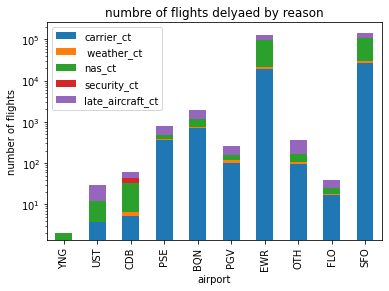

In [102]:
#ploting the delayed factors in terms of top ten delayed airports 

top[["carrier_ct", ' weather_ct','nas_ct','security_ct','late_aircraft_ct']].plot(kind="bar", stacked=True,logy=True)
plt.title('numbre of flights delyaed by reason')
plt.xlabel('airport')
plt.ylabel('number of flights');

>From the above chart analysis we found out the carrier was the delaying  factor for most of the flights

## Other Visualization

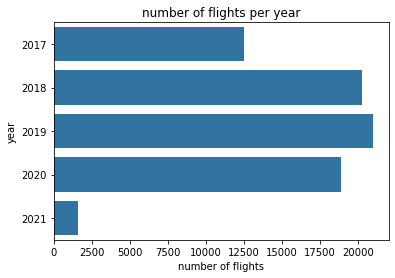

In [33]:
#visualize the number of flights per year
base_color = sb.color_palette()[0]

sb.countplot(data=flights, y='year',color =base_color)
plt.xlabel('number of flights')
plt.title('number of flights per year',);

>from the plot above we can see that in 2019 has the higiest number of flights

In [19]:
#preparing the data to plot the carrier vs the carrier delay to see the out layers 
df_carrier = flights.groupby('carrier').sum('carrier_delay')
df_carrier.reset_index(inplace = True)


In [20]:
df_carrier.head()

,carrier,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,7767284,24462,733948.0,105363.0,26781.83,3893.46,35507.72,53.84,39126.36,17577.0,1353.0,8145671.0,2299171.0,570344.0,2112284.0,2679.0,3161193.0
1,AA,9741561,30838,3367974.0,601395.0,186279.66,20654.62,202831.66,1489.85,190138.98,81754.0,7718.0,38247280.0,13068660.0,1904005.0,8969797.0,78935.0,14225883.0
2,AS,6861079,21812,844499.0,134861.0,31229.17,2513.31,63651.56,824.29,36642.93,12348.0,2104.0,6669661.0,1875948.0,201384.0,2413589.0,30236.0,2148504.0
3,B6,6245206,19722,1054175.0,251341.0,82446.58,4202.24,75758.37,610.08,88323.64,26552.0,2817.0,18318948.0,5955338.0,454989.0,4405881.0,30683.0,7472057.0
4,DL,13717459,43066,3494169.0,451572.0,144017.52,20300.79,165069.74,503.86,121678.95,43191.0,6706.0,30314137.0,11200413.0,2301342.0,8188009.0,31454.0,8592410.0


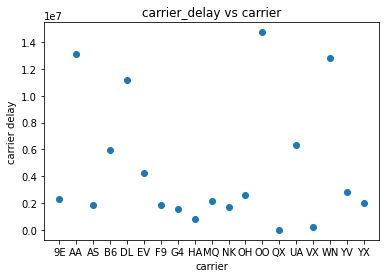

In [25]:
#plotting the result 

plt.scatter(data = df_carrier, x='carrier', y = ' carrier_delay')
plt.title('carrier_delay vs carrier')
plt.xlabel('carrier')
plt.ylabel('carrier delay');

for most of the carriers we see that their delay nearly approxemiate but there is some carrier that has outliers

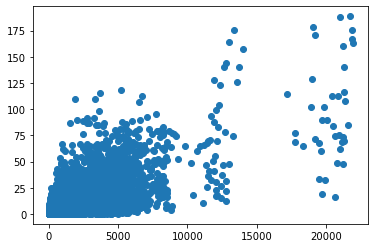

In [36]:
#qarr_flights vs weather_ct

plt.scatter(data =flights, x = 'arr_flights', y = ' weather_ct')

>approxematily there is a realtionship between number of flights and numbre of flights gots canceled by weather factor is postivie realtion

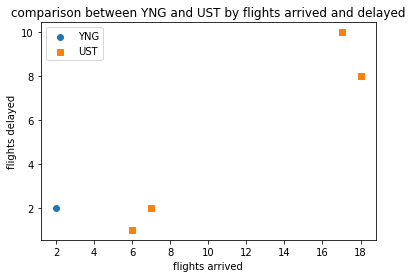

In [34]:
#comparison between YNG and UST by flights arrived and delayed 

cat_markers = [['YNG', 'o'],
               ['UST', 's']]

for cat, marker in cat_markers:
    df_cat = flights[flights['airport'] == cat]
    plt.scatter(data = df_cat, x = 'arr_flights', y = 'arr_del15', marker = marker)
plt.legend(['YNG','UST'])
plt.title('comparison between YNG and UST by flights arrived and delayed')
plt.ylabel('flights delayed')
plt.xlabel('flights arrived');

> for the above chart we aimed to compare the YNG airport vs UST airport but due to lack of data we couldnt do it 

In [57]:
#preparing the data -reassemble the data and put into new data frame for the number of delyaed carrier by the reason 

topten_delayed_carrier = flights.groupby('carrier').sum('arr_flights')
topten_delayed_carrier['portion_of_delayed_flights'] = topten_delayed_carrier['arr_del15'] / topten_delayed_carrier['arr_flights']
top_delayed_carrier = topten_delayed_carrier.sort_values('portion_of_delayed_flights', ascending = False)
top_delayed_carrier.reset_index(inplace = True)
top_delayed_carrier = top_delayed_carrier.head(10)
top_delayed_carrier

,carrier,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,portion_of_delayed_flights
0,VX,714099,2017,88651.0,23431.0,4351.47,857.04,10330.39,90.77,7801.32,1466.0,353.0,1369519.0,242474.0,36422.0,610755.0,4790.0,475078.0,0.264306
1,B6,6245206,19722,1054175.0,251341.0,82446.58,4202.24,75758.37,610.08,88323.64,26552.0,2817.0,18318948.0,5955338.0,454989.0,4405881.0,30683.0,7472057.0,0.238424
2,F9,8010447,25983,456044.0,99854.0,27982.14,1197.35,33216.77,0.00,37457.00,10287.0,609.0,6881177.0,1851212.0,89542.0,1590208.0,0.0,3350021.0,0.218957
3,EV,9797972,29461,729249.0,145949.0,39107.05,2558.48,54078.67,0.00,50205.03,25757.0,2174.0,11959531.0,4246318.0,357173.0,3525174.0,0.0,3830866.0,0.200136
4,G4,8895996,27954,305842.0,57044.0,16063.62,3613.72,13975.00,280.43,23112.36,15966.0,1021.0,4176168.0,1541364.0,291209.0,663678.0,10003.0,1669914.0,0.186515
5,YV,7599676,23861,590456.0,107202.0,34400.75,6399.55,26795.42,260.35,39345.81,20661.0,1404.0,8190692.0,2852212.0,694589.0,1226748.0,11256.0,3405887.0,0.181558
6,OH,6822315,21464,772990.0,138696.0,37187.65,6319.39,35211.22,292.51,59685.10,33177.0,2072.0,9349231.0,2590898.0,571866.0,1489013.0,13185.0,4684269.0,0.179428
7,AA,9741561,30838,3367974.0,601395.0,186279.66,20654.62,202831.66,1489.85,190138.98,81754.0,7718.0,38247280.0,13068660.0,1904005.0,8969797.0,78935.0,14225883.0,0.178563
8,MQ,10279116,32501,851941.0,152110.0,31705.41,8797.10,56557.69,220.52,54829.76,33618.0,2166.0,9342335.0,2197162.0,845673.0,2596990.0,8706.0,3693804.0,0.178545
9,UA,9470787,29976,2164133.0,378975.0,87699.13,13453.50,156715.73,48.96,121058.15,39001.0,5373.0,26942543.0,6326904.0,1475095.0,8530682.0,2832.0,10607030.0,0.175116


In [61]:
#gathering the required data into one data frame

top_carrier = top_delayed_carrier[['carrier','carrier_ct',' weather_ct','nas_ct','security_ct','late_aircraft_ct']]
top_carrier.set_index('carrier',inplace = True)
top_carrier

,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
carrier,,,,,
VX,4351.47,857.04,10330.39,90.77,7801.32
B6,82446.58,4202.24,75758.37,610.08,88323.64
F9,27982.14,1197.35,33216.77,0.00,37457.00
EV,39107.05,2558.48,54078.67,0.00,50205.03
G4,16063.62,3613.72,13975.00,280.43,23112.36
YV,34400.75,6399.55,26795.42,260.35,39345.81
OH,37187.65,6319.39,35211.22,292.51,59685.10
AA,186279.66,20654.62,202831.66,1489.85,190138.98
MQ,31705.41,8797.10,56557.69,220.52,54829.76


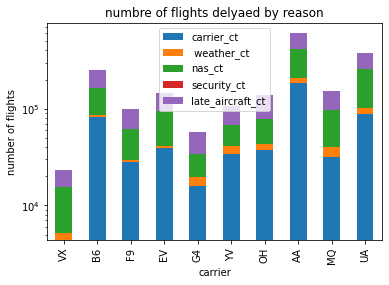

In [63]:
#ploting the delayed factors in terms of top ten delayed carrier

top_carrier[["carrier_ct", ' weather_ct','nas_ct','security_ct','late_aircraft_ct']].plot(kind="bar", stacked=True,logy=True)
plt.title('numbre of flights delyaed by reason')
plt.xlabel('carrier')
plt.ylabel('number of flights');

>by comparing the carrier name with the flights canceled by factors we see that the carrier is the dominant factor